In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit, njit
from time import perf_counter as time
from functools import lru_cache, cache
import scipy.optimize

In [2]:
file = np.genfromtxt(r"..\Data\Messungen\20210110_153212_log.csv", skip_header=46, skip_footer=2, delimiter=",")
versuch6 = file[:, 3]
# temp = file[:, 5]
x_list6 = np.arange(0, len(versuch6)*10, 10)

In [3]:
file = np.genfromtxt(r"..\Data\Messungen\20210110_170115_log.csv", skip_header=46, skip_footer=2, delimiter=",")
versuch7 = file[:, 3]
# temp = file[:, 5]
x_list7 = np.arange(0, len(versuch7)*10, 10)

In [4]:
file = np.genfromtxt(r"..\Data\Messungen\20210113_145516_log.csv", skip_header=46, skip_footer=2, delimiter=",")
versuch8 = file[:, 3]
# temp = file[:, 5]
x_list8 = np.arange(0, len(versuch8)*10, 10)

In [5]:
file = np.genfromtxt(r"..\Data\Messungen\20210113_162641_log.csv", skip_header=46, skip_footer=2, delimiter=",")
versuch9 = file[:, 3]
# temp = file[:, 5]
x_list9 = np.arange(0, len(versuch9)*10, 10)

In [6]:
file = np.genfromtxt(r"..\Data\Messungen\20210114_144535_log.csv", skip_header=46, skip_footer=2, delimiter=",")
versuchA = file[:, 3]
# temp = file[:, 5]
x_listA = np.arange(0, len(versuchA)*10, 10)

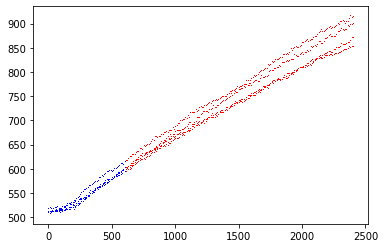

In [7]:
versuch = np.concatenate((versuch6, versuch7, versuch8, versuch9))
x_list = np.concatenate((x_list6, x_list7, x_list8, x_list9))

versuch_1000 = [a for a, b in zip(versuch, x_list) if b <= 600]
x_list_1000 = [b for a, b in zip(versuch, x_list) if b <= 600]

plt.plot(x_list, versuch, "r,")
plt.plot(x_list_1000, versuch_1000, "b,")
plt.show()

In [8]:
x_size = 55 + 2
y_size = 29 + 2
z_size = 25 + 2
dx = 0.1 #m
dt = 0.05 #s
time_steps = int((40*60) // dt)
print(time_steps)

source = 500 / dx**3 / 60

wand = 0.0

d = 0.03

47999


In [9]:
data1 = np.zeros((x_size, y_size, z_size))
# data1 = 450 * np.ones((x_size, y_size, z_size))
data1[0, :, :] *= wand
data1[:, 0, :] *= wand
data1[:, :, 0] *= wand
data1[-1, :, :] *= wand
data1[:, -1, :] *= wand
data1[:, :, -1] *= wand

data2 = np.zeros((x_size, y_size, z_size))
# data2 = wand * 450 * np.ones((x_size, y_size, z_size))

sensor = np.zeros((time_steps))

In [10]:
@njit
def generateNextTimestep(data_1, data_2, source, d):
  for x in range(1, x_size - 1):
    for y in range(1, y_size - 1):
      for z in range(1, z_size - 1):
        border = (x == 1) + (y == 1) + (z == 1) + (x == x_size-2) + (y == y_size-2) + (z == z_size-2)
        border *= 1 - wand - 0.0001 
        data_2[x, y, z] = data_1[x, y, z] + (d*dt/(dx**2)) * (data_1[x-1, y, z] + data_1[x+1, y, z] + data_1[x, y-1, z] + data_1[x, y+1, z] + data_1[x, y, z-1] + data_1[x, y, z+1] - (6 - border) * data_1[x, y, z])
        if x == 11 and y == y_size//2 and z == 11:
          data_2[x, y, z] += source*dt

3
   1019 1019.00


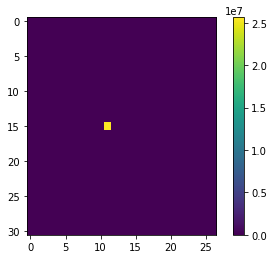

   1838  919.00


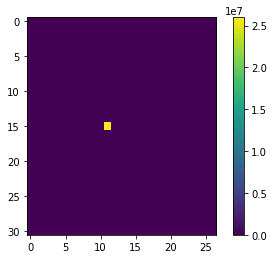

   2709  903.00


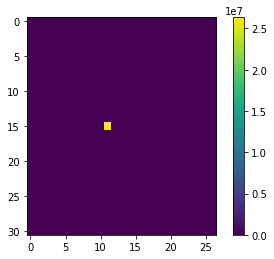

   3580  895.00


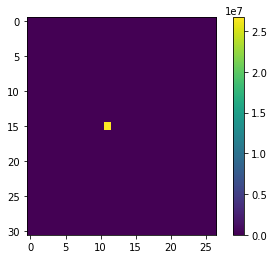

   4473  894.60


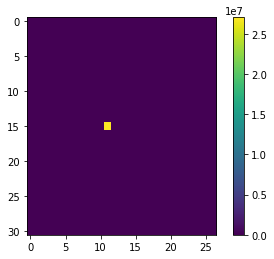

   4878  813.00


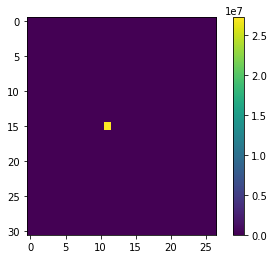

   5273  753.29


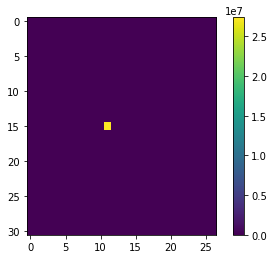

   5687  710.88


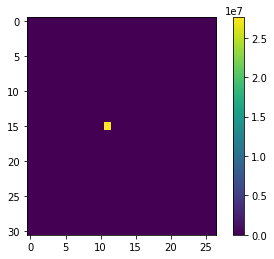

   6091  676.78


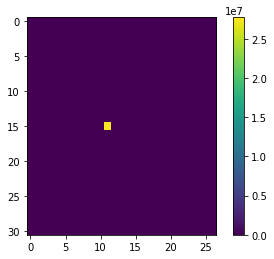

   6949  694.90


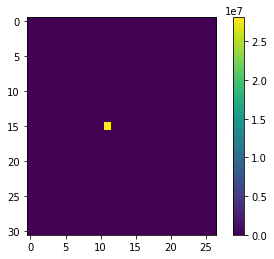

   7782  707.45


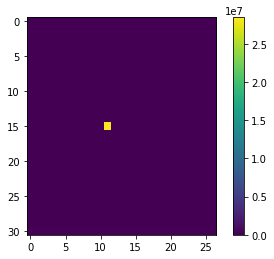

   8649  720.75


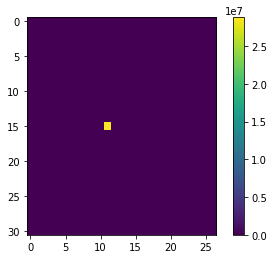

   9516  732.00


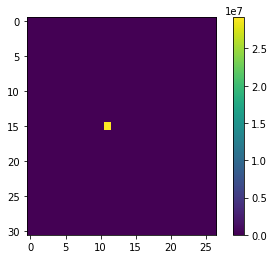

  10462  747.29


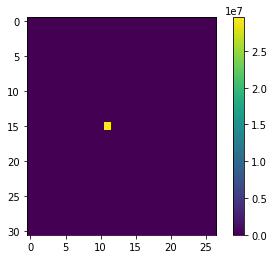

  11403  760.20


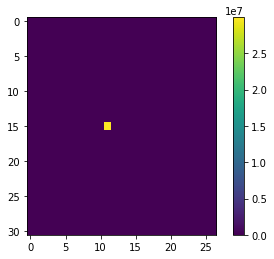

  12354  772.12


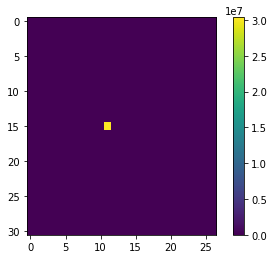

  13212  777.18


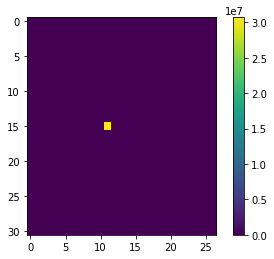

  14136  785.33


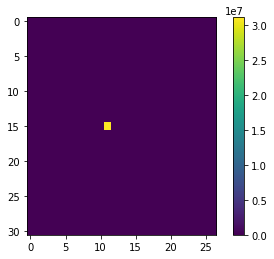

  14869  782.58


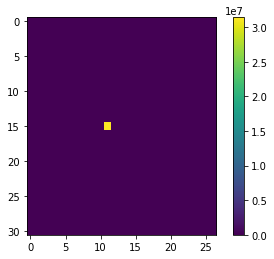

  15256  762.80


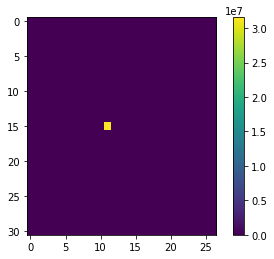

  16121  767.67


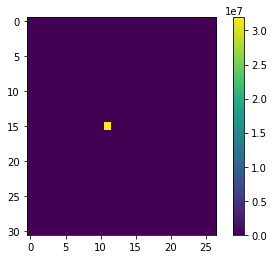

  17061  775.50


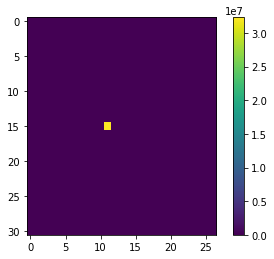

  18008  782.96


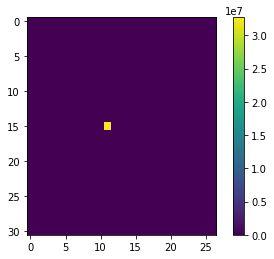

  18944  789.33


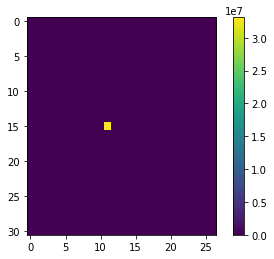

  19890  795.60


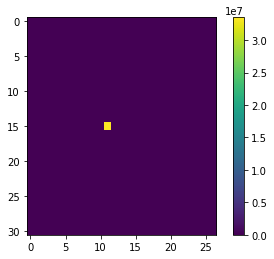

  20641  793.88


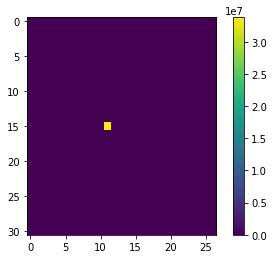

  21390  792.22


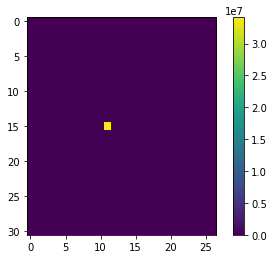

  21747  776.68


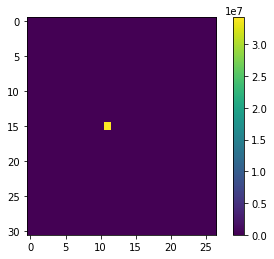

  22147  763.69


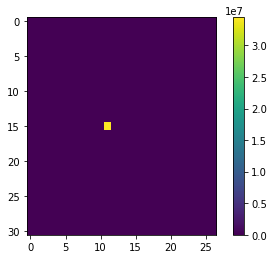

  23032  767.73


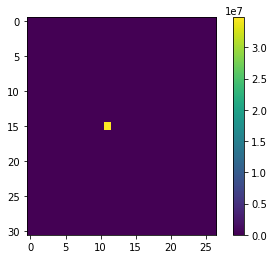

  23979  773.52


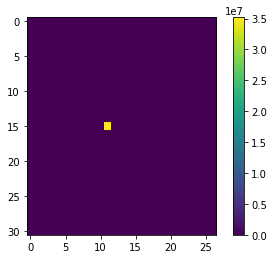

  24857  776.78


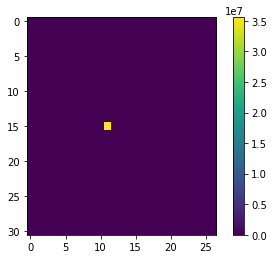

  25786  781.39


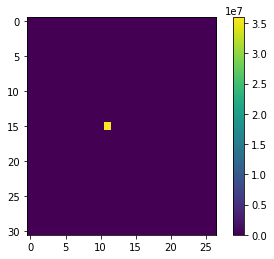

  26735  786.32


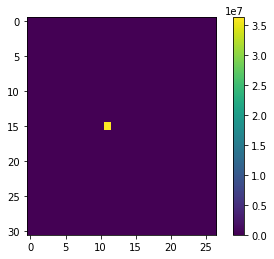

  27658  790.23


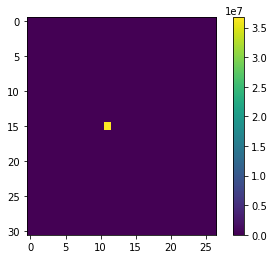

  28604  794.56


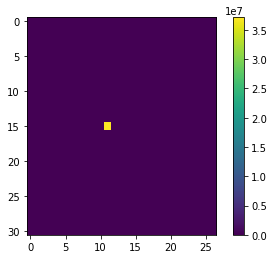

  29537  798.30


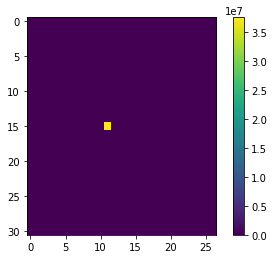

  30483  802.18


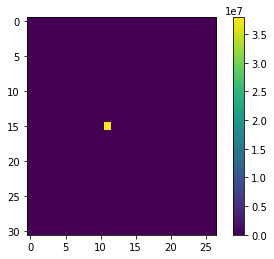

  31398  805.08


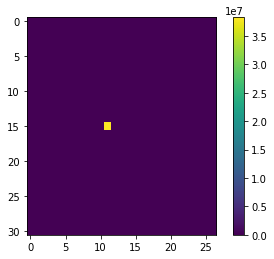

  32328  808.20


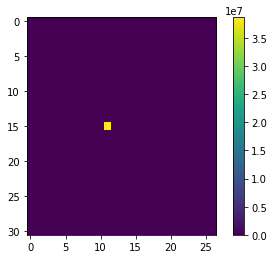

  33267  811.39


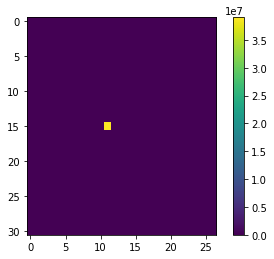

  34180  813.81


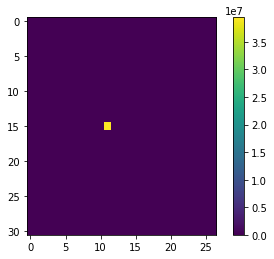

  34997  813.88


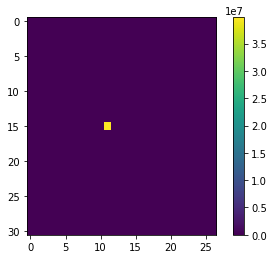

  35887  815.61


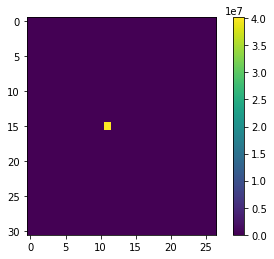

  36811  818.02


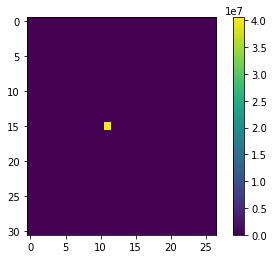

  37756  820.78


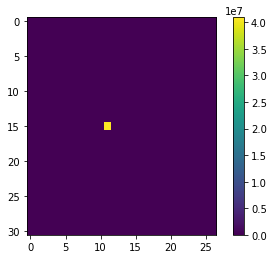

  38689  823.17


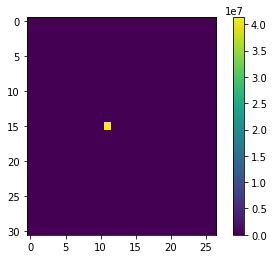

  39625  825.52


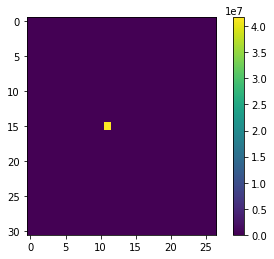

  40558  827.71


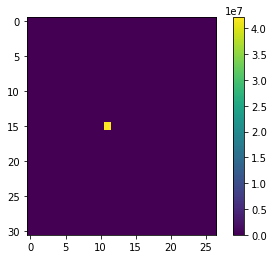

  41473  829.46


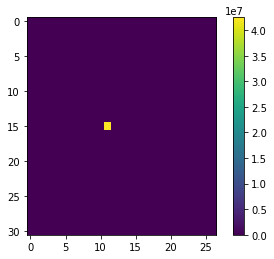

  42382  831.02


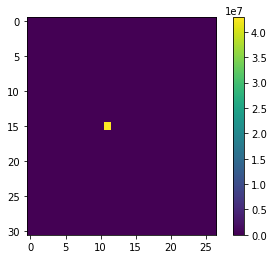

  43131  829.44


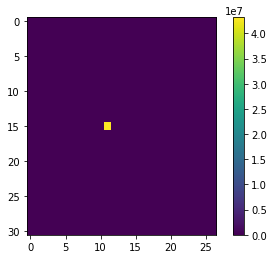

  44067  831.45


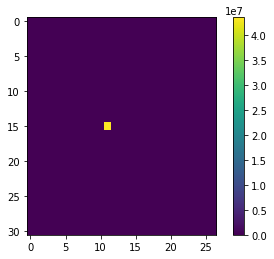

  44925  831.94


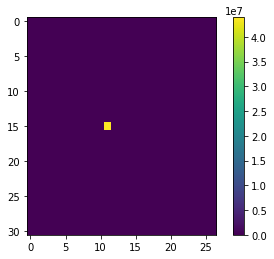

  45855  833.73


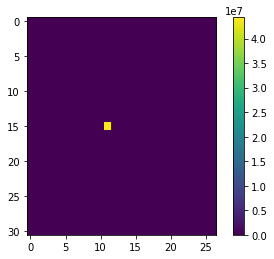

  46794  835.61


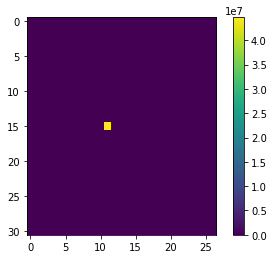

  47727  837.32


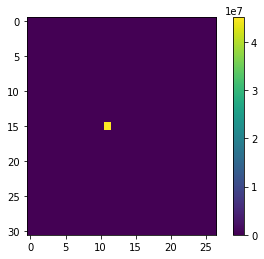

57.410786


In [20]:
t = time()
tt = time()
k = 0
source = 500/dx**3/60
for i in range(time_steps):
        if time()-tt > 1:
            tt = time()
            k += 1
            print(f"{i:7} {i/k:7.2f}")
            plt.imshow(data1[11])
            plt.colorbar()
            plt.show()
            
        diff = np.gradient(data1, dx, axis=(0, 1, 2))
        if i == 0:
            print(len(diff))
        for i, d in enumerate(diff):
            data1 += d*dt/dx**2 * np.gradient(d, dx, axis=i)
#         data1 += d*dt/dx**2 * np.sum(np.array(np.gradient(np.array(np.gradient(data1, dx, axis=(0, 1, 2))), dx, axis=(1, 2, 3))), axis=0)
        data1[11, y_size//2, 11] += source*dt
        sensor[i] = data1[x_size-11, 13, 12]
print(time() - t)

In [12]:
# @cache
def get_y(x, slope, y_abs, d):
    # setup ------------------------------------------
    x_size = 55 + 2
    y_size = 29 + 2
    z_size = 25 + 2
    dx = 0.1 #m
    dt = 0.05 #s
    time_steps = int((40*60) // dt)

    source = slope / dx**3 / 60

    wand = 0.0
    
    # initialisation ---------------------------------
    data1 = np.zeros((x_size, y_size, z_size))
    # data1 = 450 * np.ones((x_size, y_size, z_size))
    data1[0, :, :] *= wand
    data1[:, 0, :] *= wand
    data1[:, :, 0] *= wand
    data1[-1, :, :] *= wand
    data1[:, -1, :] *= wand
    data1[:, :, -1] *= wand

    data2 = np.zeros((x_size, y_size, z_size))
    # data2 = wand * 450 * np.ones((x_size, y_size, z_size))

    sensor = np.zeros((time_steps))
    
    # calculation ------------------------------------
    t = time()
    for i in range(time_steps//2):
        generateNextTimestep(data1, data2, source, d)
        sensor[2*i] = data2[x_size-11, 13, 12]
        generateNextTimestep(data2, data1, source, d)
        sensor[2*i+1] = data1[x_size-11, 13, 12]
    print(time() - t)
    
    return sensor[:-1] + y_abs

8.407067000000005


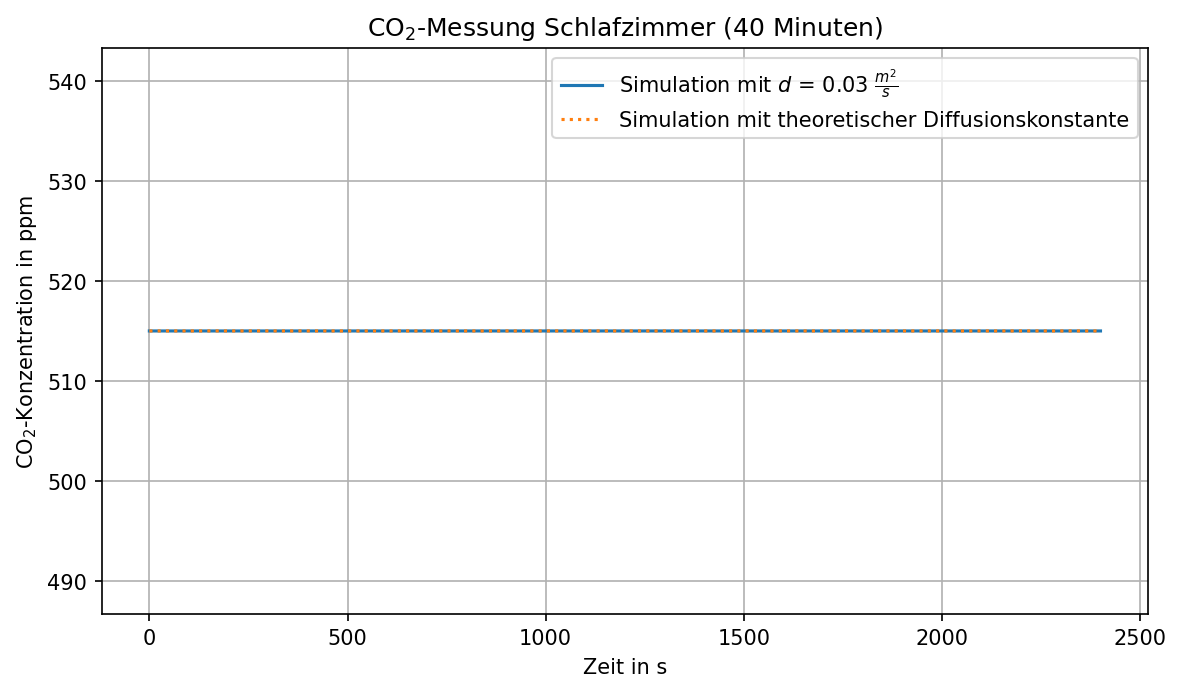

In [13]:
fig = plt.figure(figsize=(9, 5), dpi=150)
ax = fig.add_subplot(111)
ax.set_title("CO$_2$-Messung Schlafzimmer (40 Minuten)")
ax.grid("both")

ax.set_xlabel(r"Zeit in s")
ax.set_ylabel(r"CO$_2$-Konzentration in ppm")

ax.plot(np.arange(0, time_steps*dt, dt)[:-1], sensor[:-1]+515, label=r"Simulation mit $d$ = 0.03 $\frac{m^2}{s}$")
#ax.plot(x_list, versuch, "r,", label="Messdaten")
ax.plot(np.arange(0, time_steps*dt, dt)[:-1], get_y(x_list, 500, 515, 0.0000177), ":", label="Simulation mit theoretischer Diffusionskonstante")


ax.legend()
plt.show()

In [14]:
def f(x, a, b, c):
    return b*((np.exp(-x*a))/a + x) + c

In [15]:
# coeff, delta = scipy.optimize.curve_fit(f, np.arange(0, 1000, dt), sensor[:int(1000//dt)+1]+515)

In [16]:
coeff, delta = scipy.optimize.curve_fit(f, x_list_1000, versuch_1000)

C:\Users\NILSIR~1\AppData\Local\Temp/ipykernel_15876/3044804815.py:2: RuntimeWarning: overflow encountered in exp
  return b*((np.exp(-x*a))/a + x) + c


485.817394045287
0.02783761377401616


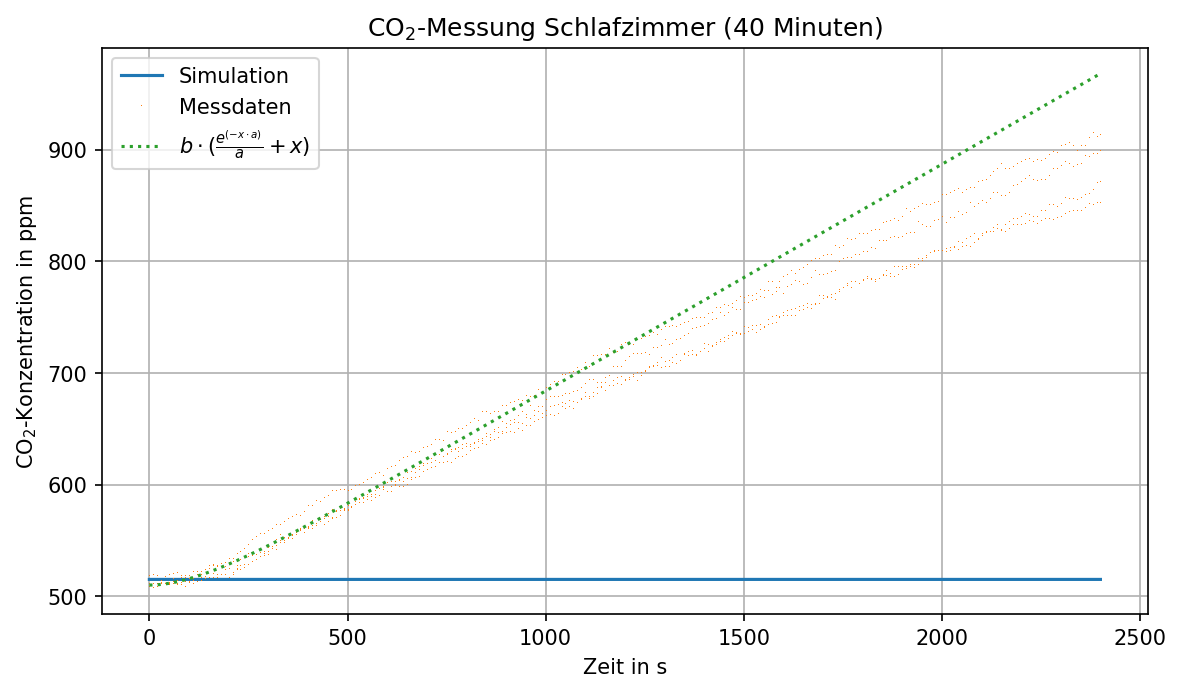

In [17]:
fig = plt.figure(figsize=(9, 5), dpi=150)
ax = fig.add_subplot(111)
ax.set_title("CO$_2$-Messung Schlafzimmer (40 Minuten)")
ax.grid("both")

ax.set_xlabel(r"Zeit in s")
ax.set_ylabel(r"CO$_2$-Konzentration in ppm")

ax.plot(np.arange(0, time_steps*dt, dt)[:-1], sensor[:-1]+515, label="Simulation")
ax.plot(x_list, versuch, ",", label="Messdaten")
ax.plot(np.arange(0, time_steps*dt, dt), f(np.arange(0, time_steps*dt, dt), *coeff), ":", label=r"$b \cdot (\frac{e^{(-x\cdot a)}}{a} + x)$")
print(coeff[1]*dx**3*60 * 55*29*25)
print(coeff[0]*0.02/0.005)

ax.legend()
plt.show()

In [18]:
x = np.arange(0, time_steps*dt, dt)
curve = get_y(x, 400, 0, 0.02)
curve2 = get_y(x, 600, 0, 0.02)

7.755411499999994


KeyboardInterrupt: 

In [ ]:
plt.plot(x[:10000], curve[:10000])
plt.plot(x[:10000], curve2[:10000])
plt.plot(x[:10000], curve[:10000]*1.5, ":")
plt.show()

In [ ]:
len(x)

In [ ]:
time_steps

In [ ]:
dt

In [ ]:
dt*10000

In [ ]:
# setup ------------------------------------------
x_size = 88 + 2
y_size = 42 + 2
z_size = 25 + 2
dx = 0.1 #m
dt = 0.01 #s
# time_steps = (int((60*60) // dt / 2) + 1) * 2
time_steps = 5000000
print(time_steps)

source = 1.0 / dx**3 / 60

d = 0.001

wand = 0.0

# initialisation ---------------------------------
data1 = np.zeros((x_size, y_size, z_size))
# data1 = np.ones((x_size, y_size, z_size))
# data1[0, :, :] *= wand
# data1[:, 0, :] *= wand
# data1[:, :, 0] *= wand
# data1[-1, :, :] *= wand
# data1[:, -1, :] *= wand
# data1[:, :, -1] *= wand

data2 = np.zeros((x_size, y_size, z_size))
# data2 = wand * np.ones((x_size, y_size, z_size))

sensor = np.zeros((time_steps))

# function ---------------------------------------
@njit
def generateNextTimestep(data_1, data_2, source, d):
    for x in range(1, x_size - 1):
        for y in range(1, y_size - 1):
            for z in range(1, z_size - 1):
                border = (x == 1) + (y == 1) + (z == 1) + (x == x_size-2) + (y == y_size-2) + (z == z_size-2)
                # border *= 1 - wand - 0.0001 
                data_2[x, y, z] = data_1[x, y, z] + (d*dt/(dx**2)) * (data_1[x-1, y, z] + data_1[x+1, y, z] + data_1[x, y-1, z] + data_1[x, y+1, z] + data_1[x, y, z-1] + data_1[x, y, z+1] - (6 - border) * data_1[x, y, z])
                if x == 8 and y == y_size//2 and z == 11:
                    data_2[x, y, z] += source*dt

# calculation ------------------------------------
t = time()
for i in range(time_steps//2):
    generateNextTimestep(data1, data2, source, d)
    sensor[2*i] = data2[x_size-7, 17, 9]
    generateNextTimestep(data2, data1, source, d)
    sensor[2*i+1] = data1[x_size-7, 17, 9]
print(time() - t)

header_str = """dt = 1s
d = 0.001m^2/s
dx = 0.1m
x_max = 8.8m
y_max = 4.2m
z_max = 2.5m
sensor position: x = 8.2m, y = 1.6m, z = 0.8m
source position: x = 0.7m, y = 2.1m, z = 1.0m"""

np.savetxt("wohnzimmer_simulation.txt", sensor[::100], header=header_str)

In [ ]:
plt.plot(sensor)
plt.show()

In [ ]:
sensor[-1]

In [ ]:
sensor_schlaf = np.loadtxt("wohnzimmer_simulation.txt", skiprows=2)

def get_y_schlaf(t, d, s):
    dt = 1
    dd = 0.001
    return sensor_schlaf.take((t/dt * d/dd).astype(int)) * s / (d/dd)

In [ ]:
len(sensor_schlaf)

In [ ]:
800/dt * 0.03/dd

In [ ]:
plt.plot(x_list6[:100], versuch6[:100], ".")
plt.plot(x_list6[:30], get_y_schlaf(x_list6[:30], 0.03, 400) + 509)
plt.show()

In [ ]:
x_list = np.arange(0, 2500, 1)
plt.plot(x_list, get_y_schlaf(x_list, 0.001, 1))
plt.plot(x_list, get_y_schlaf(x_list, 0.002, 1))
plt.plot(x_list, get_y_schlaf(x_list, 0.001, 2))
plt.plot(x_list[:1000], get_y_schlaf(x_list[:1000], 0.005, 2))
plt.show()

In [ ]:
x_list9[:10]

In [ ]:
len(x_list9)

In [ ]:
x_list9[2:30:3]

In [ ]:
sensor_schlaf[0]

In [ ]:
sensor_schlaf[1000]

In [ ]:
sensor_schlaf[2000]

In [ ]:
sensor_schlaf[10000]

In [ ]:
sensor_schlaf[11000]

In [ ]:
sensor_schlaf[1000000]

In [ ]:
sensor_schlaf[1001000]

In [ ]:
y = [get_y(0, 300, 0, d) for d in np.arange(0.0025, 0.021, 0.0025)]

In [ ]:
for y_list in y:
    plt.plot(y_list[:120000])
plt.show()

In [ ]:
for y_list in y:
    print(y_list[-1]-y_list[-2])

In [ ]:
for y_list in y:
    plt.plot(y_list[1:] - y_list[:-1])
plt.show()